# Assignment 1

In [2]:
import pandas as pd
import re

In [3]:
from google.colab import drive
drive.mount('/content/drive')

!wget -P /content/drive/MyDrive/NTU_Studies/2021_Fall

Mounted at /content/drive
wget: missing URL
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.


## Read data

`ig5000.csv`是一份包含5000篇ig真實貼文的資料集，label=0指日常文，label=1指廣告。

In [4]:
ig5000 = '/content/drive/MyDrive/NTU_Studies/2021_Fall/assignment-1-tanlianhui/ig5000.csv'

ig = pd.read_csv(ig5000).dropna()
ig

,text,label
0,V領設計能夠修飾臉型😍\n減齡泡泡袖洋裝😉\n👉https://lihi1.com/JDym...,1
1,【20210303】\n能勇敢追夢的人\n身上都閃著和煦的光芒\n也是好生羨慕！\n-\n敬...,0
2,玉 耳環\n#耳環 #玉 #earrings,1
3,【美國瘋潮WWE Taiwan】\n不管是WWE Elite還是AEW Unrivaled系...,1
4,🌈\n尋晚的post 一po已經被秒殺好多件的Vintage sports windbrea...,1
...,...,...
4995,🌈長桿34cm綠瑪瑙煙嘴煙斗\n復古長桿煙斗\塞入菸草即可使用\n162028\001390,1
4996,抗敏之選*Eunice 藍甘菊舒緩潔面乳~1000ml \n\n★好多美容院都用佢★\n\n...,1
4997,今天特地比較慢出門\n但還是太早到學校了🤦🏼‍♀️\n可能下雨關係車好多今天,1
4998,大量韓國新貨上架🌸\n歡迎到門市選購\n-\n🟥🔺🔶🟧🔸🟡🟨🟩🟢🔹🔷🟦🟣🟪\n———————...,1


## Clean and tokenize text

In [5]:
! pip3 install -U ckip-transformers
from ckip_transformers.nlp import CkipWordSegmenter

     |████████████████████████████████| 2.9 MB 8.1 MB/s 
     |████████████████████████████████| 3.3 MB 37.1 MB/s 
     |████████████████████████████████| 895 kB 37.4 MB/s 
     |████████████████████████████████| 636 kB 36.5 MB/s 
     |████████████████████████████████| 52 kB 1.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [6]:
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^\u4E00-\u9FD5]"

def clean(texts, clean_re):
    output = []
    for text in texts:
        text = re.sub(clean_re, '', text)
        output.append(text)
    return output

In [7]:
def tokenize(texts, driver, batch_size, max_length):
    output=[]
    ws  = driver(texts, use_delim=False, 
                batch_size = batch_size,
                 max_length = max_length
                    )
    output = [" ".join(ls) for ls in ws]
    return output

In [8]:
ws_driver = CkipWordSegmenter(device = 0, level = 3)

Downloading:   0%|          | 0.00/804 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/388M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/107k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/301 [00:00<?, ?B/s]

In [9]:
ig_cleaned = clean(ig['text'].to_list(), text_cleaning_re)
ig_segmented = tokenize(ig_cleaned, ws_driver, 512, 250)

Inference: 100%|██████████| 11/11 [02:51<00:00, 15.63s/it]


In [10]:
ig_segmented[:10]

['領 設計 能夠 修飾 臉型 減齡 泡泡袖 洋裝 領型領 厚薄 薄 款',
 '能 勇敢 追 夢 的 人 身 上 都 閃 著 和煦 的 光芒 也 是 好生 羨慕 敬 那 天 一起 看 的 夕陽 真 希望 哪 天 能 一起 去 看 極光',
 '玉 耳環 耳環 玉',
 '美國 瘋潮 不管 是 還是 系列 的 人偶 公仔 在 這 應有盡有 正版 周邊 商品 人氣 熱賣 中 想要 最多 最 優惠 最 齊全 的 美國 職業 摔角 正版 周邊 熱門 商品 快點 來 我 的 賣場 參考 選購 吧 露天 賣場 蝦皮 賣場 公仔 人偶 美國 瘋潮 美國 代購 職業 摔角 美泰潮 台北市 歡迎 面交 重量級 冠軍 摔角 人偶 開箱文 摔角 狂熱 冠軍 腰帶',
 '尋晚 的 一 已經 被 秒殺 好多 件 的 每 一 件 成色 和 都 好 靚 而且 都 是 女生 可 穿 的 男女 可 穿 喜歡 的 不要 錯過 了 我 地 留 貨 啦 肩 長衣 長 運動風 褸 應該 係 春天 最 好 嘅 伴侶 潮濕 毛毛雨 又 可以 着 到 唔 着 時 又 可以 摺 埋 一 舊 放 喺 袋 入 邊 入 邊 可以 配件 小 背心 營造 型格 小 性感 又 可以 同 男朋友 兩 份 着',
 '記錄 之前 棚 拍 幕後 花絮 還 沒 發完 大概 還要 再 發 三 篇',
 '時間 真的 過 的 好 快 我 在 富邦 滿 一 年 了 想 當初 剛 踏入 富邦 的 時候 還是 一 個 小 男孩 這 一 年 發生 了 好多 的 事情 用 了 半 年 的 時間 晉升 業務 主任 謝謝 一直 協助 我 的 學長姐 由衷 感謝 一路 支持 我 的 家人 和 朋友 從 一 開始 一 個 人 到 現在 有 三 個 夥伴 陪 著 我 一起 努力 我們 都 希望 可以 讓 工作 更 有 價值 順良 的 業務 生活 相信 每 個 選擇 都 是 最 好 的 安排 富邦 人壽 高慶 通訊處',
 '和 你們 在一起 可以 短暫 的 忘記 煩惱 我 的 都 是 你們 最後 一 張 不要 看 六弦 吉他社 黑色 安息日 台灣 小吃部 十 年 後 收聽',
 '最近 的 生活 連 照片 都 用 去年 的 我 還 是 大學生 吧',
 '泰泰 新款 上架 一如既往 超極 推薦 材質 超棒 有 型 又 好看 舒適 哪裡 找 得 到 大家 

## Build Word2vec model

In [11]:
from gensim.models import Word2Vec

# A list of lists of token
w2v_corpus = [text.split() for text in ig_segmented]

In [12]:
# 設定embedding維度
sentence_len= 200

# Define model
w2v_model = Word2Vec(size = sentence_len,
                window = 5,
                min_count = 3,
                workers = 4,
                batch_words = 10000)
                #sg = 1 : use skip-gram model
                
w2v_model.build_vocab(w2v_corpus)

In [13]:
w2v_model.train(w2v_corpus, total_examples = len(w2v_corpus), epochs = 32)

(8363582, 10027776)

In [14]:
len(w2v_model.wv.vocab)

11699

In [15]:
# print word embeddings of '我'
w2v_model.wv['我']

array([ 1.8734571 ,  1.006333  ,  0.2986468 ,  1.8997405 , -0.5812928 ,
        0.32127008, -0.76671946, -0.5045762 , -1.7717824 ,  0.2171433 ,
       -0.942103  ,  0.6123963 , -1.2440307 ,  0.87103885,  0.01387089,
       -0.13525525, -0.24973589,  1.0485474 ,  0.20017354,  0.3094483 ,
        0.75864804,  0.58818775,  0.63237053,  0.10158443, -0.72871226,
       -1.0048779 ,  0.5903104 , -0.03062462,  0.6422119 ,  0.17984898,
       -1.7080821 ,  1.326254  , -0.010504  , -1.4346746 , -0.38259572,
        1.8045181 , -0.43764478, -0.958389  ,  0.37672806, -0.42178   ,
        1.170814  ,  0.03820473,  0.96019053,  0.53224325,  0.26667678,
       -0.6613967 ,  0.99825394,  0.21988085,  0.89969605,  0.606159  ,
        0.7505542 ,  0.8050047 , -0.3098247 , -0.10845809, -0.09492546,
        0.705219  , -0.46828434,  0.0429253 , -1.3542439 , -0.9591669 ,
       -1.4752991 ,  0.17771429, -1.3827496 , -0.13099262, -0.23666653,
       -0.52618104, -0.41794023, -0.7340087 ,  1.1918292 ,  0.58

### View word2vec results

In [16]:
similar_words = {
    search_term:
    [item[0] for item in w2v_model.wv.most_similar([search_term], topn=5)]
    for search_term in
    ['人', '國家', '巧克力', '水晶', '天氣']
}
similar_words

{'人': ['地方', '親', '事', '對方', '畢竟'],
 '國家': ['總統', '階層', '民族', '階級', '身份'],
 '天氣': ['冷', '晴', '轉涼', '季節', '冬天'],
 '巧克力': ['豆沙', '餅乾', '草莓', '厚片', '奶酥'],
 '水晶': ['笑哈哈', '手鏈', '手鍊', '拉利瑪', '天然石']}

# Exercise 1 (100%)

在`ig5000.csv`中，請找出所有修飾「水晶」的詞彙並以他們的word embeddings作詞彙分群(cluster)。

- 盡量排除掉與水晶是NN compound的詞彙，如:「**香氛**水晶」、「**財運**水晶」
- 請勿直接擷取出現在「水晶」前的所有tokens
- Cluster analysis請採用hierarchical clustering


這題的output至少需要包含:

1. 你所擷取出的詞彙的embedding matrix (如底下w2v_d) (50%)
2. 以此matrix產出的cluster dendrogram (50%)



In [17]:
# finding "水晶"
# eliminating compound nouns
from ckip_transformers.nlp import CkipPosTagger

In [18]:
pos_driver = CkipPosTagger(device = 0, level = 3)

pos = pos_driver(w2v_corpus)

Downloading:   0%|          | 0.00/2.79k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/388M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/107k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/301 [00:00<?, ?B/s]

Inference: 100%|██████████| 20/20 [05:45<00:00, 17.29s/it]


In [19]:
# for i in ig_segmented:
#     # print(i)
#     m = re.findall("水晶", i)
#     if m != []:
#         print(m)

In [20]:
# Pack word segmentation and part-of-speech results
def pack_ws_pos_sentece(sentence_ws, sentence_pos):
   assert len(sentence_ws) == len(sentence_pos)
   res = []
   for word_ws, word_pos in zip(sentence_ws, sentence_pos):
       res.append(f"{word_ws}({word_pos})")
   return "\u3000".join(res)

# Show results
list_all = set()
for sentence_ws, sentence_pos in zip(w2v_corpus, pos):
    result = (pack_ws_pos_sentece(sentence_ws, sentence_pos))
    # print(result)

    a = re.findall(pattern = '[\u4e00-\u9fff]+\([^N]\w+\)　水晶\([a-zA-Z]+\)', string = result)
    # print(a)

    for i in a:
        # print(i)
        i = re.sub(pattern = "[^\u4e00-\u9fff]+", repl = "", string = i)
        i = re.sub(pattern = "水晶", repl = "", string = i)
        if i!=[]:
          # print(i)
          list_all.add(i)

print(list_all)
# print(len(list_all))

{'延甲指', '發光', '優惠', '拉長石', '的', '彩印', '與', '有助', '加', '手繪', '到', '白', '璀璨', '查看', '璦薇兒', '保養', '治療', '購買', '除毛', '鋪', '黃', '擺設', '矯正', '搭配', '笑哈哈', '復合', '畢業', '黑', '真'}


In [21]:
for i in w2v_corpus:
  for j in i:
    if j == "延甲指":
      print(i)

['冰透', '魚鱗', '客製化', '造型', '設計', '所有', '款式', '報價', '均', '含', '前置', '作業', '基礎', '保養', '凝膠', '加厚', '免費', '換色', '下', '次', '續作', '贈', '免', '卸甲', '費用', '手足', '凝膠', '課程', '教學', '地址', '高雄', '新興區', '中山', '橫路號', '對面', '美麗綻', '一樓', '是', '自助', '洗衣', '隔壁', '就', '有', '停車場', '步行', '秒', '到', '六合', '夜市', '捷運', '美麗島站號', '出口', '預約', '時段', '儲值', '優惠', '送', '送', '延甲', '不', '分', '長度', '凝膠', '延甲指', '水晶', '延甲', '指', '他', '店制', '手足', '凝膠', '卸甲', '續作', '單色', '跳色', '貓眼', '鉑金', '以上', '手部', '均', '一', '價', '足部', '均一', '價', '鑽飾類', '顆', '起', '可', '傳', '圖', '報價', '手部', '造型', '款', '預約', '請', '主動', '告知', '部位', '款式', '卸甲', '延甲', '日期', '時段', '姓名', '電話', '追蹤', '粉專', '奈兒', '美甲', '設計', '高雄', '美甲', '美甲', '推薦', '美甲', '教學', '凝膠', '課程', '教學', '凝膠', '美甲', '創業', '教學', '課程', '價格', '優惠', '中麻煩', '請', '來電', '詢問', '下午', '晚上', '前', '可', '撥打', '其餘', '時間', '勿', '擾', '喔', '課程', '內容', '或是', '其他', '問題', '現場', '提供', '免費', '諮詢', '有', '興趣', '有', '喜歡', '再', '學習', '請', '來電', '詢問', '報名', '課程', '或', '安排', '時間', '現場', '解說', '凝膠', '專業', '創業班', '一', '

In [ ]:
w2v_ls = []
d = dict()
ct = 0
for i in list_all:
  # print(i)
  try:
    w2v_ls.append(w2v_model.wv[i])
    d[ct] = i
    ct = ct + 1
  except KeyError:
    # print("KeyError:", i)
    continue

w2v_d = pd.DataFrame(w2v_ls)
w2v_d = w2v_d.rename(index = d)

In [30]:
w2v_d

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
發光,0.264097,-0.001345,0.300062,-0.262708,-0.194165,-0.070210,-0.000178,-0.082119,-0.144985,0.138548,-0.095108,0.144018,-0.163956,-0.131792,-0.278293,-0.011824,0.199536,0.057099,0.029707,0.255597,0.309411,0.027645,-0.195384,0.103610,-0.086573,-0.042498,0.022373,0.022975,0.112868,-0.048454,0.066219,0.194483,0.196940,-0.243538,0.007420,0.012678,0.174085,0.072269,0.121559,-0.391243,...,-0.020103,0.227069,0.268563,-0.084094,0.054702,-0.162163,0.092786,0.062137,-0.034567,0.106706,-0.021187,0.181576,-0.148701,0.383870,0.083204,-0.108392,-0.200443,0.208243,-0.117474,-0.132220,0.066437,-0.102402,-0.032487,-0.003587,-0.027994,0.091452,0.188160,-0.068192,0.103773,0.027745,-0.189871,0.190802,0.070516,0.177689,0.016004,0.078193,0.209192,-0.026939,-0.036336,-0.013184
優惠,-0.329491,-0.357317,2.278049,-0.876883,0.556299,-0.862304,-0.409984,-1.801856,0.499418,-1.096430,1.317665,1.148667,-0.341049,1.954807,0.287940,-2.043284,-0.900710,-0.066413,-0.349109,0.888114,0.088366,-0.247286,-1.600207,0.717660,-1.217518,0.551657,1.321267,-0.396197,-0.591219,-2.153688,-0.712456,-3.555730,-0.694286,0.336258,0.086728,0.636834,-2.105973,0.378441,-0.510674,-0.804617,...,-0.553210,0.296942,-0.900025,0.961544,-1.076824,-0.901249,3.009542,-2.102561,1.031981,-0.270848,1.196263,-0.377168,-2.430588,-1.227013,0.482404,2.723363,-2.333380,1.264530,-0.986889,0.901236,0.779150,-2.160902,-0.075321,-1.374948,-1.808614,-1.959953,-1.589709,-1.353112,-0.807357,-0.494948,-1.408409,-0.629423,-1.491647,1.850821,0.245731,-2.179394,-0.150030,-1.539350,-0.502632,0.647324
拉長石,0.065134,-0.263282,0.322598,-0.619912,-0.264704,-0.312715,0.718415,-0.079407,-0.291918,0.128794,-0.502396,0.457077,-0.206706,-0.250894,-0.421227,-0.928418,0.116691,-0.694097,-0.454374,-0.220997,0.531229,0.102532,-0.491867,0.181072,0.282949,-0.319582,-0.210987,0.140414,-0.057886,-0.413773,0.059194,0.396724,-0.157544,-0.077769,-0.410874,-0.233349,0.499422,0.011871,-0.083017,-0.954818,...,-0.831211,0.001626,0.249119,0.135586,-0.175403,-0.841904,0.379250,0.571611,-0.750858,0.211557,0.142101,1.058630,-0.056137,0.524207,0.532977,-0.316233,0.313035,0.320972,-0.438939,-0.616329,-0.309141,-0.211522,-0.627564,0.518233,0.242221,0.793305,0.439956,-0.602858,0.538686,0.304568,-1.034836,0.186730,-0.509951,-0.170754,-0.236377,0.898429,0.148226,-0.133298,-0.216890,-0.240085
的,-0.019508,0.226562,-0.997786,0.336670,-0.638297,0.267884,-0.449477,-1.044384,0.415051,0.450146,0.380599,0.716668,-0.130236,-0.227034,-0.317213,-0.455570,0.536128,-0.310745,-0.277593,1.115645,-0.276408,0.162305,0.625897,-0.164888,-0.828493,-0.588990,0.100419,0.556529,-0.131764,-0.080246,0.174389,0.577852,1.028125,-1.260508,0.888311,-0.890710,0.510421,0.536066,-0.266989,-0.029906,...,0.077540,0.742184,-0.837872,0.599915,0.497966,0.271402,1.108277,-0.373105,-0.250880,-1.225654,-0.184650,0.152867,0.205160,-0.737190,0.160755,-0.062432,-1.128011,-0.041095,-0.030603,0.394635,1.229296,1.430635,0.531746,-0.119137,-0.348345,-0.279088,-1.224430,-0.253738,0.079854,-0.314469,1.495685,0.178884,0.531420,0.982248,0.816625,-1.635440,-0.880648,0.181375,-1.215156,-0.904134
彩印,0.271601,-0.028434,0.524801,-0.419890,-0.177158,-0.183865,-0.019966,-0.167665,-0.412471,-0.410556,-0.391706,0.598865,-0.255093,-0.530242,-0.373913,0.251527,-0.358099,0.128600,-0.190774,0.311459,0.433074,0.285426,0.097199,-0.056268,-0.026363,-0.014513,-0.164704,0.320178,0.363988,-0.238273,-0.030329,0.128374,-0.056855,0.084595,-0.174194,0.016254,0.193053,0.243341,0.087701,-1.115365,...,-0.321843,0.120447,0.600809,0.037557,-0.061672,-0.588091,0.285454,0.333753,-0.398664,0.217814,0.221602,0.445825,-0.137828,0.995061,0.570868,-0.306702,-0.246014,0.432227,-0.492814,-0.134789,-0.243542,-0.503839,-0.090010,0.306258,-0.026405,-0.081219,0.2502

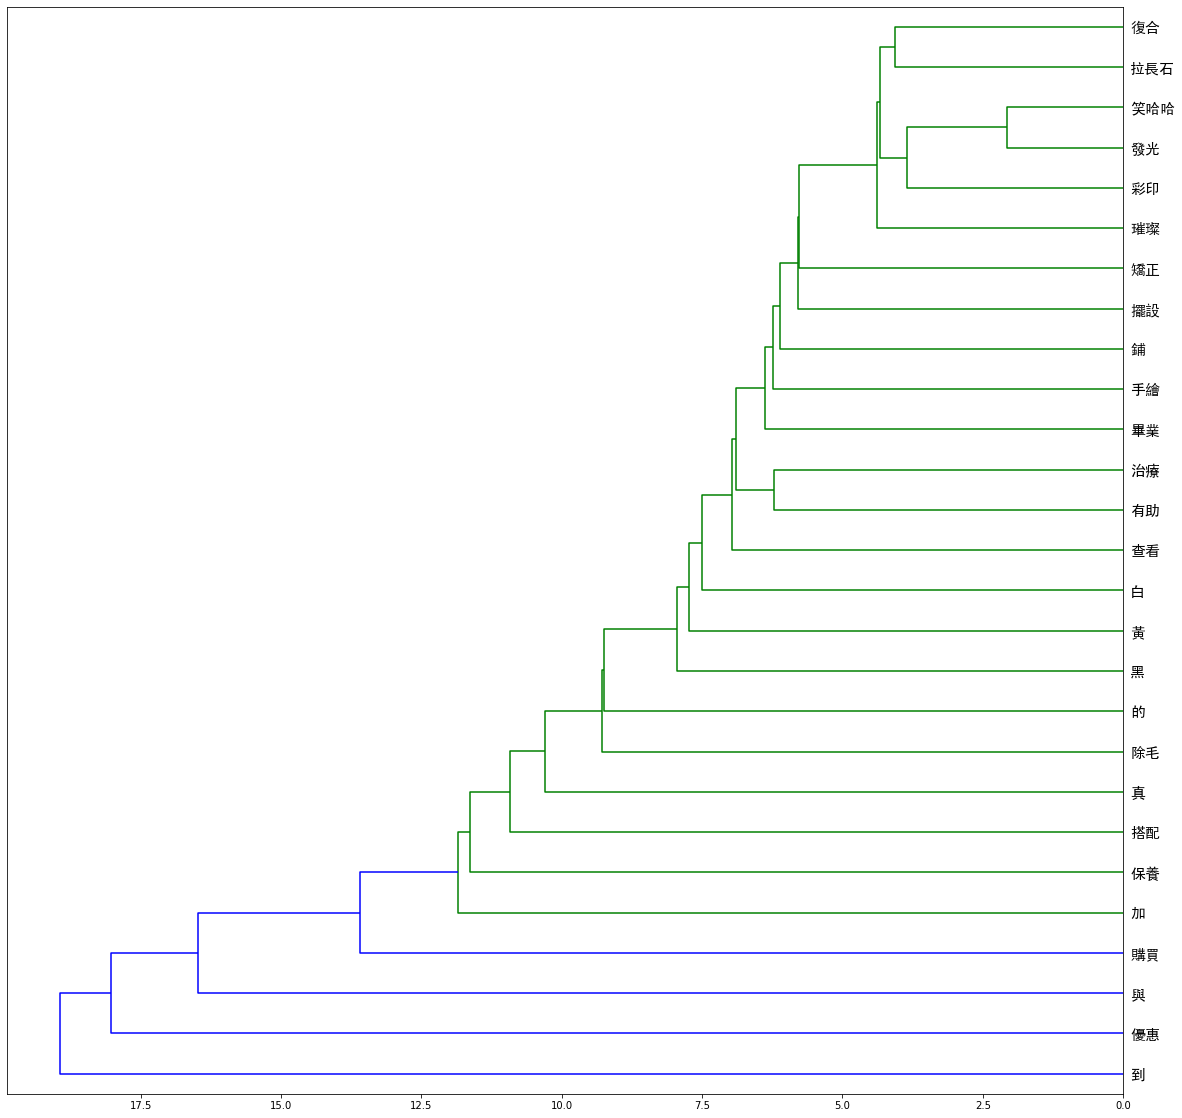

In [60]:
# -*- coding: utf-8 -*-
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm

linked = linkage(w2v_d, 'single')

labelList = list(d.values())

plt.figure(figsize=(20, 20))

dendrogram(linked, orientation = 'left', labels = labelList, distance_sort = 'descending', show_leaf_counts = True)

prop = fm.FontProperties(fname='/content/drive/MyDrive/NTU_Studies/2021_Fall/python-warmup-exercise-tanlianhui/SimHei.ttf')
plt.yticks(fontproperties = prop, fontsize=15)

plt.show()

# Bonus - Exercise 2 (+20%)

利用你的word2vec model，請訓練一個簡易的文本分類器。

- document embedding請直接平均文本中所有詞彙的詞向量(e.g.「秋天 快 到 了」直接平均4個詞的詞向量)
- 平均詞向量時，不在word2vec vocabulary裡的詞彙會引發OOV(out of vocabulary)的問題
- 有需要的話可以利用`chinese_stopwords.txt`去除停用詞
- 文本的類別在`ig5000.csv`的'label'欄位中(0=日常;1=廣告)
- 訓練方面，你可以隨意跑一些你喜歡的machine learning models (logistic regression, SVM, random forest,... deep learning除外)
- cross validation和hyperparameters tuning有空再做就好

最後你的output至少需要包含:
1. 文本的document-embeddings matrix (如下面corpus) (10%)
2. 簡述你如何解決計算document embedding時的OOV問題 (5%)
3. 你所試過的所有model和他們的test set accuracy (2.5%)
4. 表現最好的model的confusion matrix (2.5%)


In [ ]:
corpus

In [ ]:
print("Naive Bayes:", gnb.score(X_test, y_test))
print("Logistic Regression:",lgr.score(X_test, y_test))
print("Random Forest:", rfc.score(X_test, y_test))

## 表現最好的model

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(conf, xticklabels=labels, yticklabels=labels,annot=True, vmin=0, vmax=1, cmap="YlGnBu")